In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
len(df['quality'].unique())

6

In [7]:
df['quality'].nunique()

6

In [8]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
df.duplicated().sum()

240

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
demo_df=pd.DataFrame([1,2,3,3,23,2,1,2,123,333])

In [14]:
demo_df

,0
0,1
1,2
2,3
3,3
4,23
5,2
6,1
7,2
8,123
9,333


In [15]:
demo_df.duplicated().sum()

4

In [16]:
X=df.drop("quality",axis=1)

In [17]:
y=df['quality']

In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
model.score(X_train,y_train)

1.0

[Text(0.48843670280612245, 0.9705882352941176, 'x[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.22036033163265306, 0.9117647058823529, 'x[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.1168686224489796, 0.8529411764705882, 'x[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.05835459183673469, 0.7941176470588235, 'x[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.02040816326530612, 0.7352941176470589, 'x[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.00816326530612245, 0.6764705882352942, 'x[9] <= 0.435\ngini = 0.245\nsamples = 14\nvalue = [0, 2, 12, 0, 0, 0]'),
 Text(0.004081632653061225, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.012244897959183673, 0.6176470588235294, 'x[5] <= 21.5\ngini = 0.142\nsamples = 13\nvalue = [0, 1, 12, 0, 0, 0]'),
 Text(0.00816326530

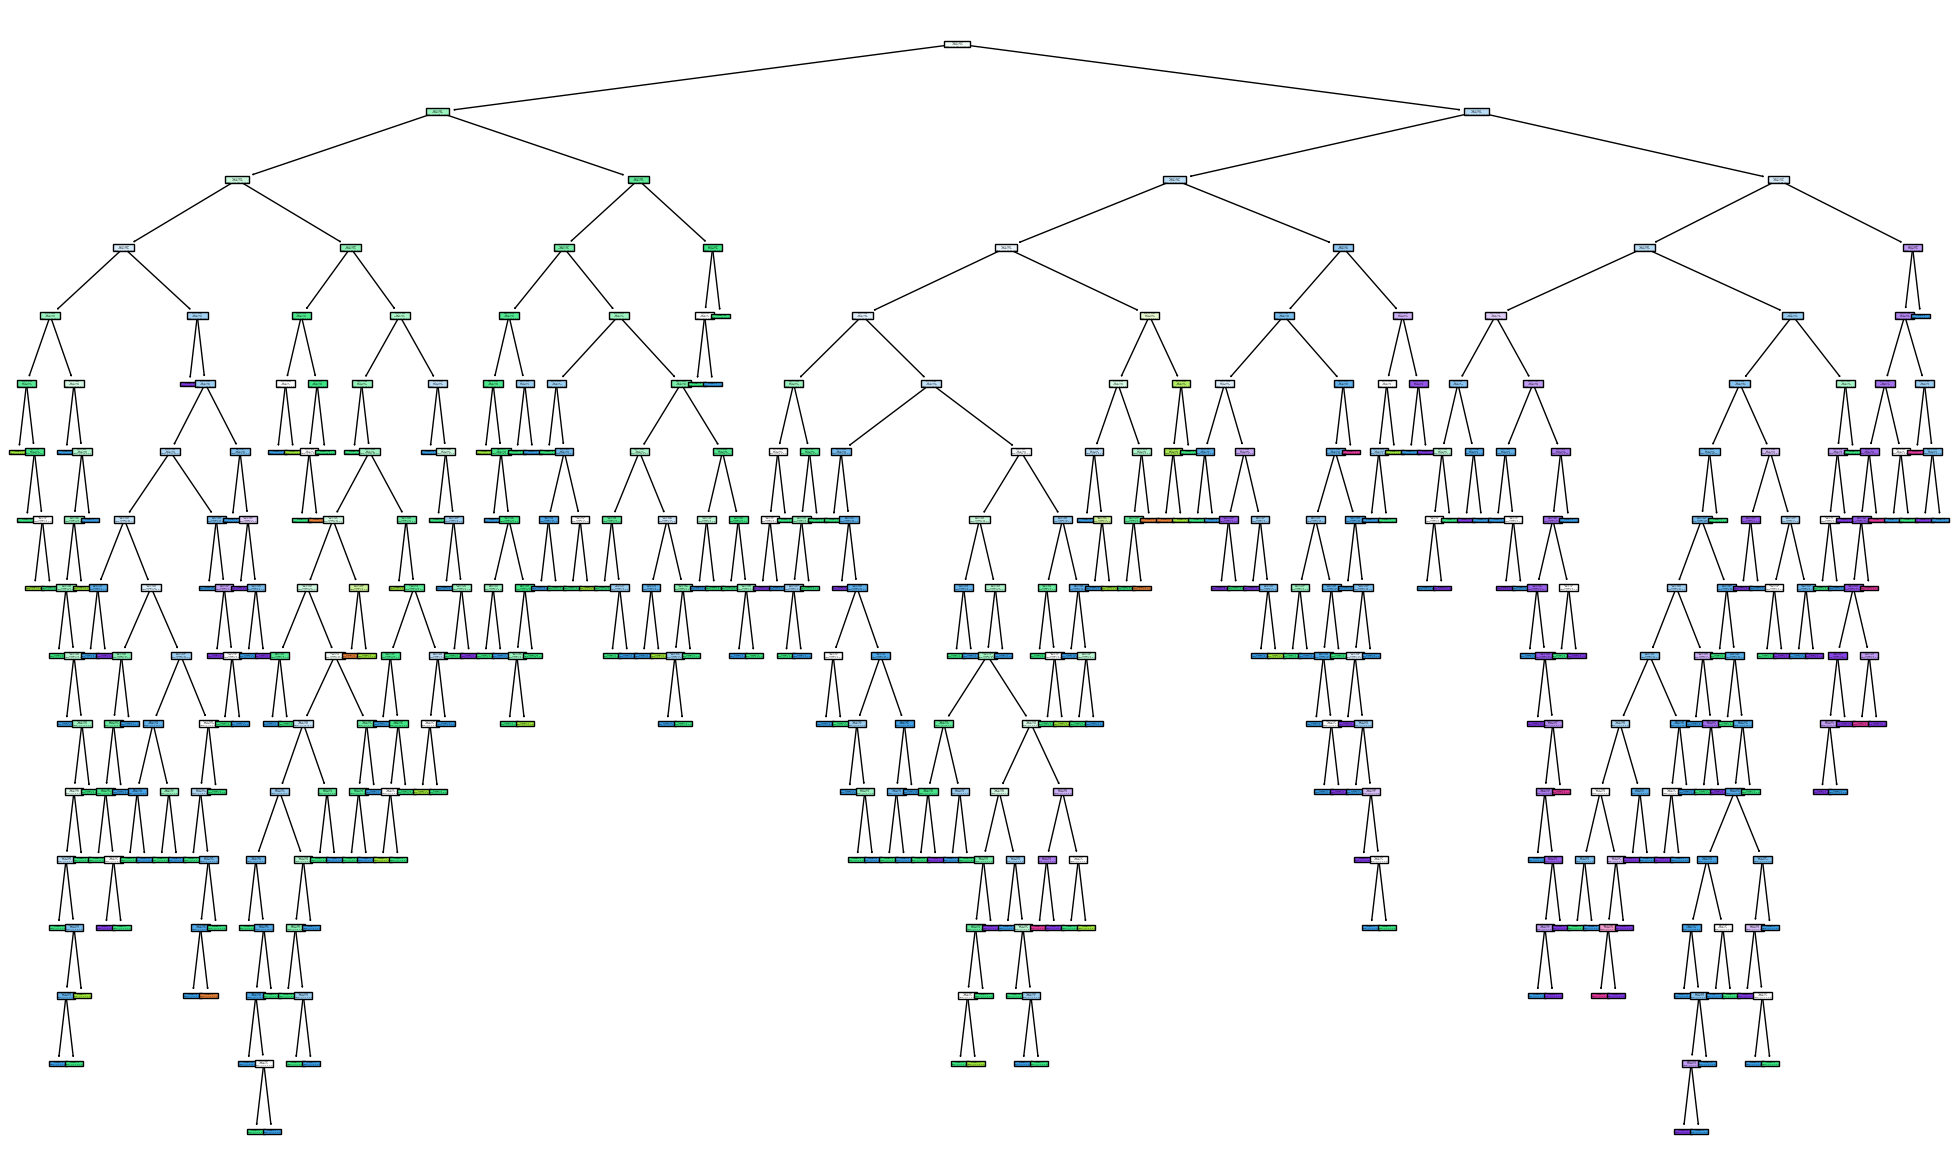

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [24]:
fig.savefig("decistion_tree_classifier.png")

In [26]:
y_predict=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_predict)

0.5011135857461024

In [29]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']

}

In [30]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [31]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [32]:
grid_searh.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [33]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 4,min_samples_split= 6,splitter='random')

In [34]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

[Text(0.5333333333333333, 0.9285714285714286, 'x[2] <= 0.319\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.30694444444444446, 0.7857142857142857, 'x[10] <= 11.289\ngini = 0.6\nsamples = 532\nvalue = [5, 24, 263, 206, 31, 3]'),
 Text(0.17777777777777778, 0.6428571428571429, 'x[10] <= 9.791\ngini = 0.56\nsamples = 450\nvalue = [5, 21, 252, 158, 14, 0]'),
 Text(0.08888888888888889, 0.5, 'x[10] <= 9.407\ngini = 0.438\nsamples = 213\nvalue = [0, 8, 150, 54, 1, 0]'),
 Text(0.044444444444444446, 0.35714285714285715, 'x[8] <= 3.348\ngini = 0.371\nsamples = 116\nvalue = [0, 4, 89, 23, 0, 0]'),
 Text(0.022222222222222223, 0.21428571428571427, 'x[0] <= 7.816\ngini = 0.273\nsamples = 76\nvalue = [0, 2, 64, 10, 0, 0]'),
 Text(0.011111111111111112, 0.07142857142857142, 'gini = 0.142\nsamples = 39\nvalue = [0, 0, 36, 3, 0, 0]'),
 Text(0.03333333333333333, 0.07142857142857142, 'gini = 0.389\nsamples = 37\nvalue = [0, 2, 28, 7, 0, 0]'),
 Text(0.06666666666666667, 0.2142857

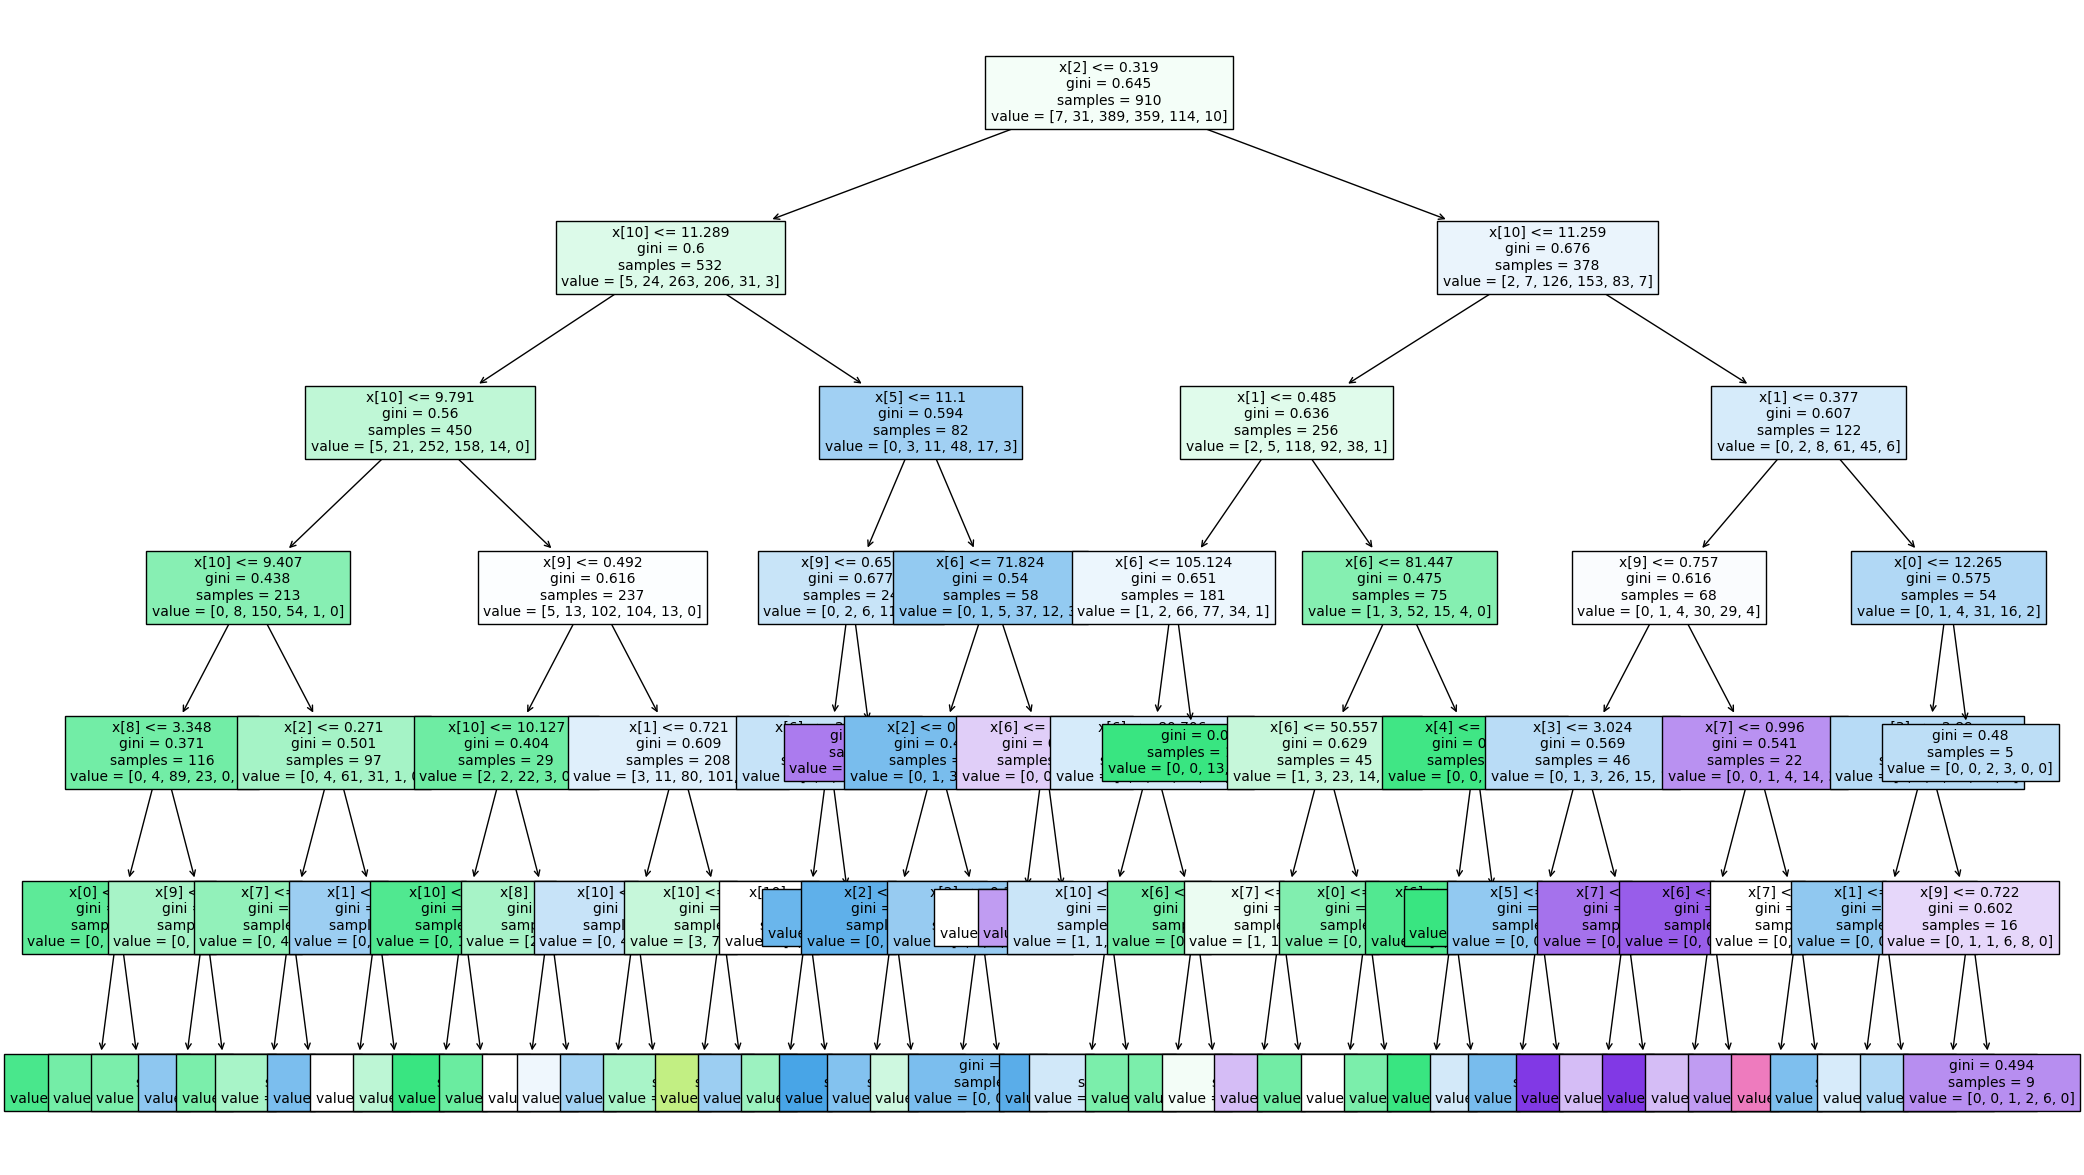

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [35]:
y_prediction2=model_with_best_params.predict(X_test)

In [44]:
accuracy_score(y_test,y_prediction2)

0.5412026726057907

In [45]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [46]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred_rf=Rf_model.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred_rf)

0.5924276169265034

In [49]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [50]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=Rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_searh.best_params_

In [ ]:
grid_searh.fit(X_train,y_train)